<table width='100%'>
<tr>
<td style='background-color:white'>
    <p align="left">
    Exercises for the Lecture<br>
        <b>Recurrent Neural Networks</b><br>
    BIFOLD Aqtivate Workshop
    </p>
</td>
<td style='background-color:white'>
    Machine Learning Group<br>
    <b>Faculty IV – Electrical Engineering and Computer Science</b><br>
    Technische Universität Berlin
</td>
</tr>
</table>

<br>
<center>
    <h1>Exercise Sheet (programming part)</h1>
</center>
<br>

In this homework, our goal is to try out recurrent neural network layers in PyTorch.

## Part 1: Visualizing the data


Because gradient computation can be error-prone, we often rely on libraries that incorporate automatic differentiation. In this exercise, we make use of the PyTorch library. You are then asked to compute the error of the neural network within that framework, which will then be automatically differentiated.

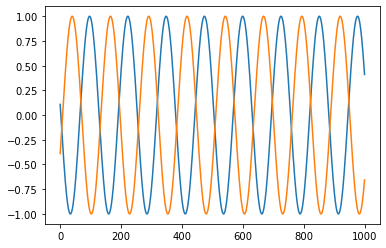

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import utils07 as utils
import solution07 as solution

# 1. Get the data and parameters
data = utils.getdata()

# 2. Visualize the time series
plt.plot(data.T)

input = torch.from_numpy(data[:, :-1])
target = torch.from_numpy(data[:, 1:])


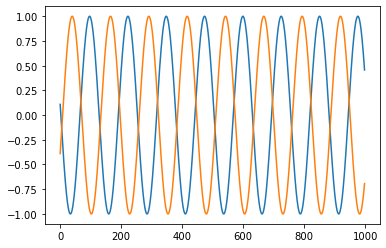

In [25]:
plt.plot(input.T)

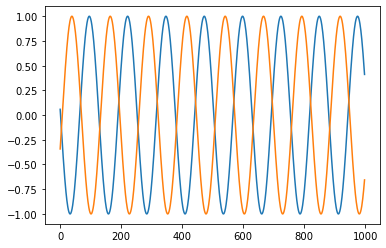

In [26]:
plt.plot(target.T)

## Part 2: Implementing a LSTM Network (15 P)

Implement a two layer LSTM network with pytorch.nn.LSTMCell with 25 hidden neurons.
At each prediction step use a linear projection layer to project the hidden representation back to the original data space.

In [2]:
class LSTM_Network(nn.Module):
	def __init__(self):
		super().__init__()  # implement two LSTMCell layers  # and one linear projection layer

	def forward(self, input, prediction_steps=0):
		# Compute the LSTM's predictions over the input
		# Compute 'prediction_steps' steps of predictions into the future
		# Return the concatenated outputs
		pass

lstm = solution.exercise1()
lstm

LSTMNetwork(
  (lstm1): LSTMCell(1, 25)
  (lstm2): LSTMCell(25, 25)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)

## Part 3: Train the LSTM and Visualize It (15P)

As the final part you tasked with implementing the necessary steps of training the previously implemented LSTM.
It should return the `loss` variable which will be backpropagated through time by the autograd engine of PyTorch.
The training setup is already fixed for you.

In [6]:
from torch import optim

lstm.double()
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm.parameters())
num_steps = 100
for i in range(num_steps):
    
    # ----- exercise 2 ------
    optimizer.zero_grad()   
    out = lstm(input)
    loss = criterion(out, target)
    loss.backward()
    optimizer.step()
    # -----------------------
    
    if i % (num_steps//10) == 0:
        print(f'Training Progress: {int(i/num_steps*100)}%, Loss:', loss.item())

with torch.no_grad():
	prediction_steps = 100
	pred = lstm(input, prediction_steps=prediction_steps)
	y = pred.detach().numpy()

Training Progress: 0%, Loss: 0.012175653990975746
Training Progress: 10%, Loss: 0.0038480848366391185
Training Progress: 20%, Loss: 0.0028064646112137223
Training Progress: 30%, Loss: 0.0017439787642590085
Training Progress: 40%, Loss: 0.0013516032607720095
Training Progress: 50%, Loss: 0.0009795091126906256
Training Progress: 60%, Loss: 0.0007346083401790285
Training Progress: 70%, Loss: 0.0005556697474959659
Training Progress: 80%, Loss: 0.00042747453858749113
Training Progress: 90%, Loss: 0.00034165894274293726


In [4]:
y.shape

(2, 1099)

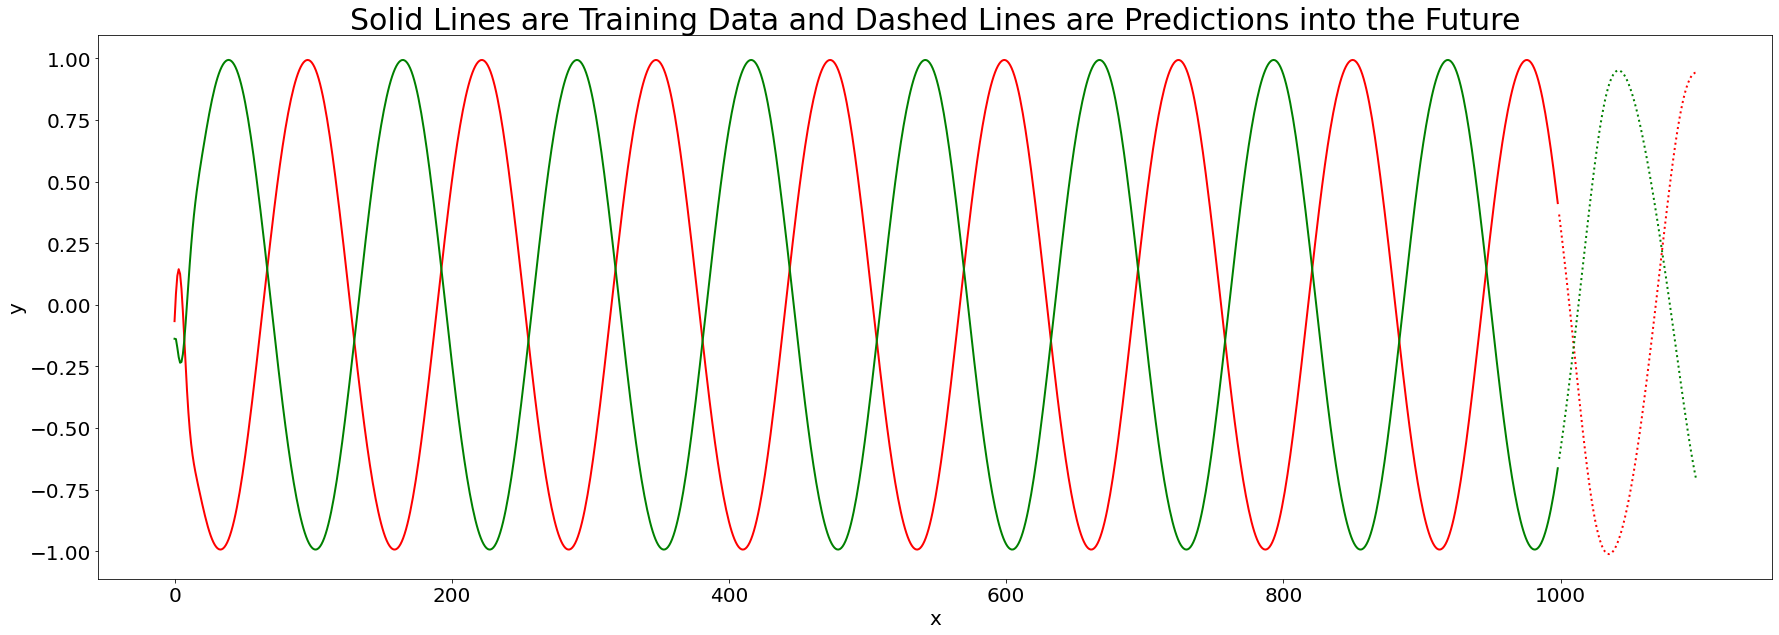

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(30, 10))
plt.title('Solid Lines are Training Data and Dashed Lines are Predictions into the Future', fontsize=30)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

def draw(yi, color):
	plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth=2.0)
	plt.plot(np.arange(input.size(1), input.size(1) + prediction_steps), yi[input.size(1):], color + ':', linewidth=2.0)

draw(y[0], 'r')
draw(y[1], 'g')